In [18]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# connect to banking database

bnx = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "muxqxstfAG00SQL.",
    database = "banking_case" 
)

In [10]:
query = "SELECT * FROM customer"

In [13]:
df = pd.read_sql(query, bnx)

C:\Users\Shariq\AppData\Local\Temp\ipykernel_2592\1385055928.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, bnx)


In [14]:
df.head(5)


,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [32]:
# SQl showed none but lets see if there is any missing data
for columns in df:
    pct_missing = sum(df[columns].isnull())
    print(f"{columns} = {round(pct_missing,2)}")

ï»¿Client ID = 0
Name = 0
Age = 0
Location ID = 0
Joined Bank = 0
Banking Contact = 0
Nationality = 0
Occupation = 0
Fee Structure = 0
Loyalty Classification = 0
Estimated Income = 0
Superannuation Savings = 0
Amount of Credit Cards = 0
Credit Card Balance = 0
Bank Loans = 0
Bank Deposits = 0
Checking Accounts = 0
Saving Accounts = 0
Foreign Currency Account = 0
Business Lending = 0
Properties Owned = 0
Risk Weighting = 0
BRId = 0
GenderId = 0
IAId = 0
Income Band = 0


In [33]:
# drop any duplicates - there are none

duplicates = df[df.duplicated(keep=False)] 

duplicates

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band


In [15]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [21]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins = bins, labels = labels, right = False)

In [ ]:
# I like R studio's ggplot style so will use that 

plt.style.use('ggplot')

<Axes: xlabel='Income Band'>

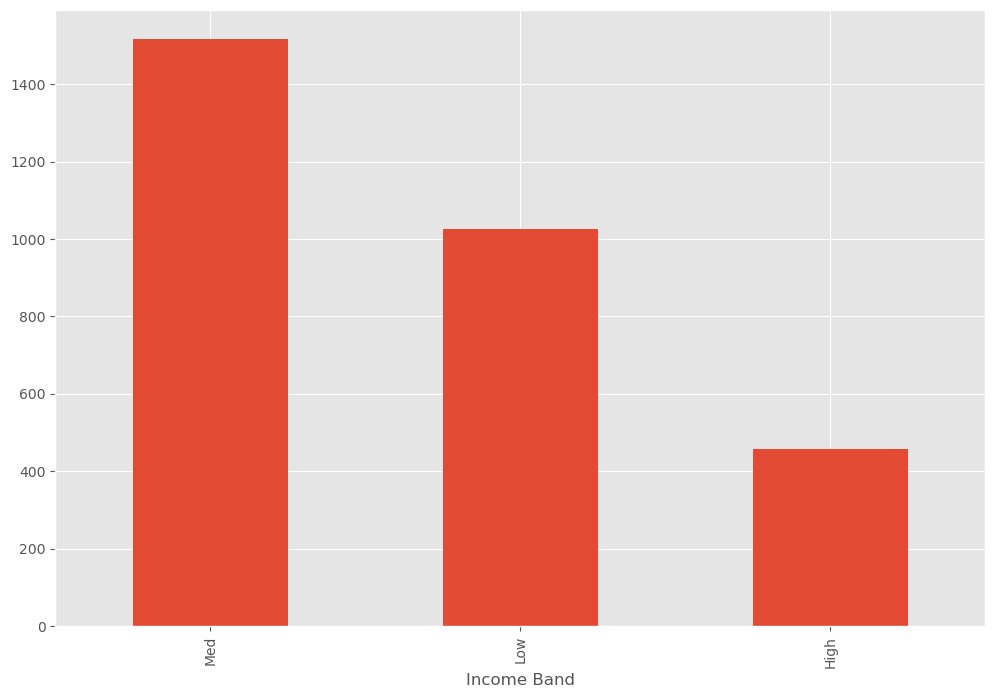

In [42]:
df['Income Band'].value_counts().plot(kind = 'bar')


In [ ]:
#Examine the distribution of unique categories in catagorical columns

categorical_cols = df[['BRId', 'GenderId','IAId', 'Amount of Credit Cards',
                       'Nationality','Occupation', 'Fee Structure', 'Loyalty Classification',
                        'Properties Owned', 'Risk Weighting', 'Income Band' ]]

for col in categorical_cols:
    print(f"value Counts for {col} :")
    display(df[col].value_counts())

In [ ]:
# Univarite graphical analysis

for i, predictor in enumerate(df[['BRId', 'GenderId','IAId', 'Amount of Credit Cards','Nationality',
                                  'Loyalty Classification','Properties Owned', 'Risk Weighting', 'Income Band' ]]):
    plt.figure(i)
    sns.countplot(data = df, x = predictor)
    

In [ ]:
# Bivarite graphical analysis - by customer gender

for i, predictor in enumerate(df[['BRId','Amount of Credit Cards','Nationality',
                                  'Loyalty Classification','Properties Owned', 'Risk Weighting', 'Income Band' ]]):
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue ='GenderId')

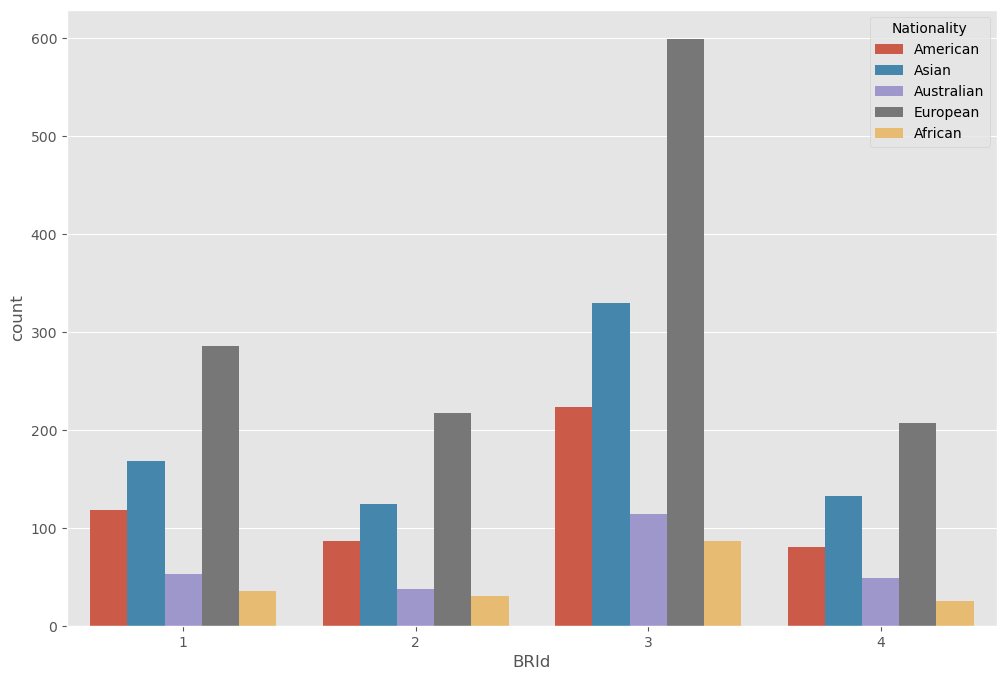

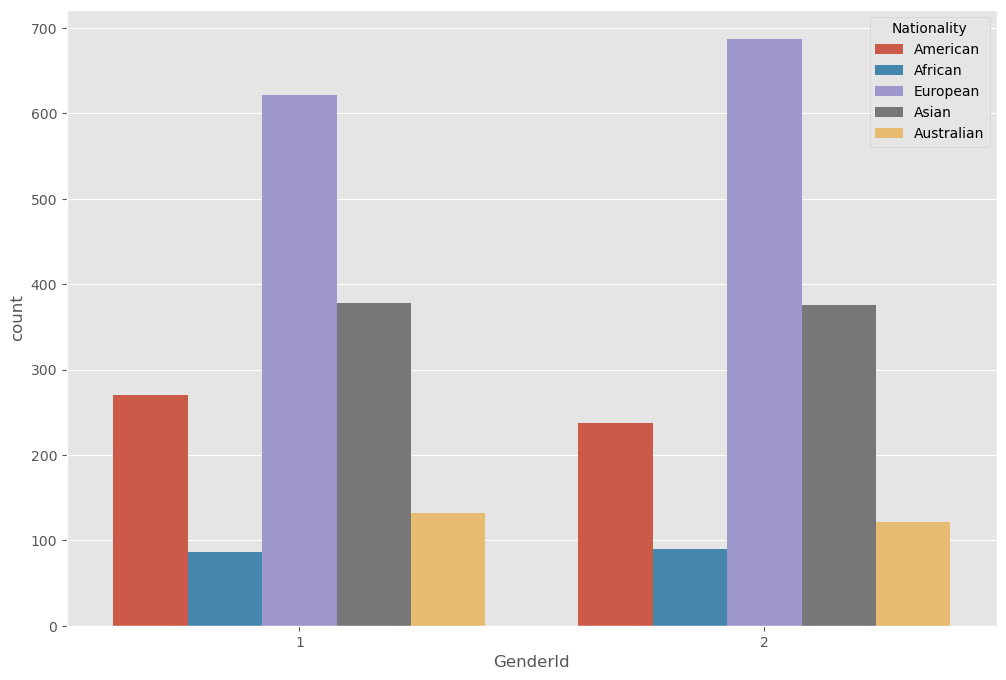

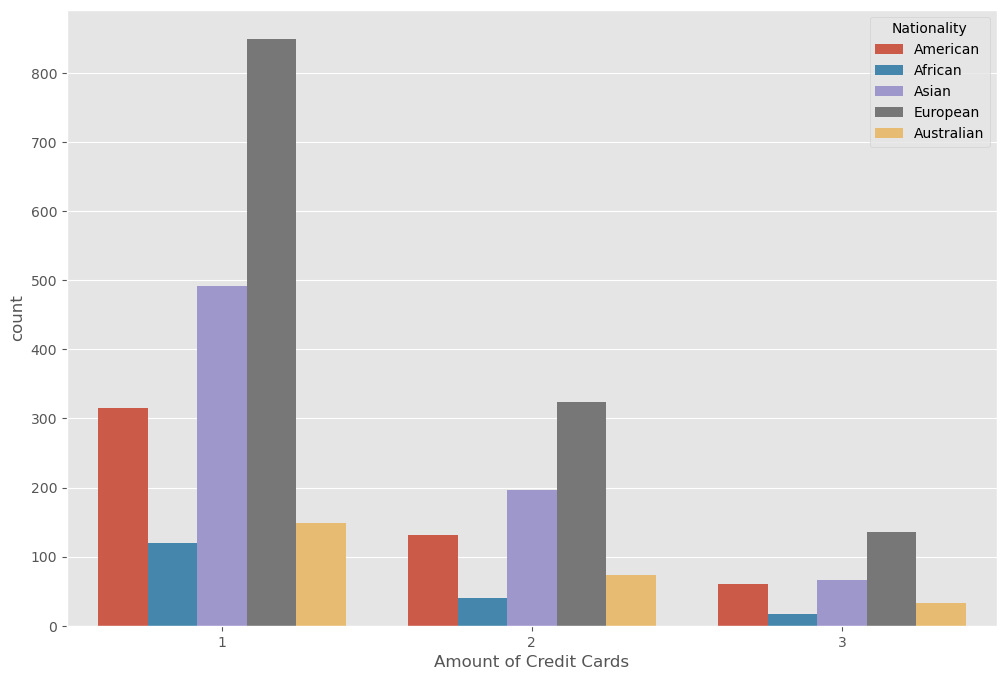

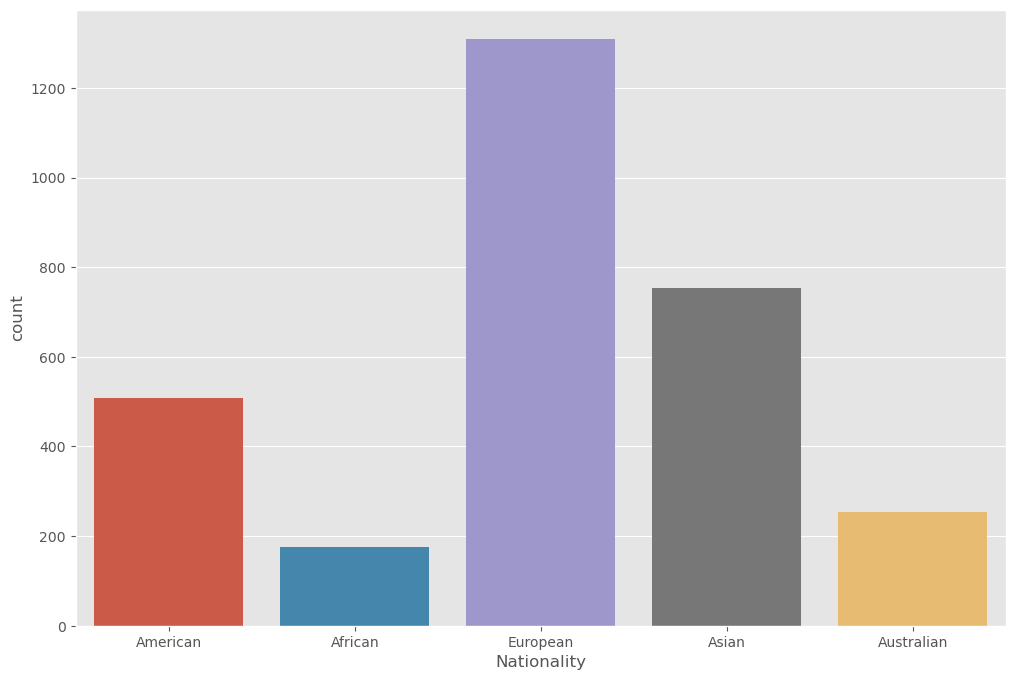

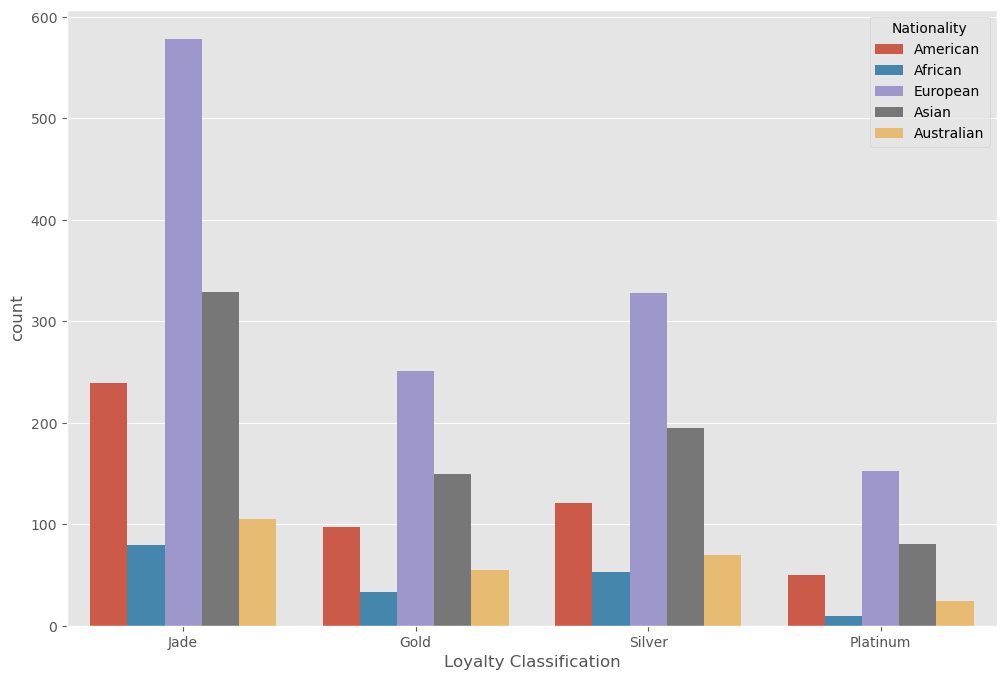

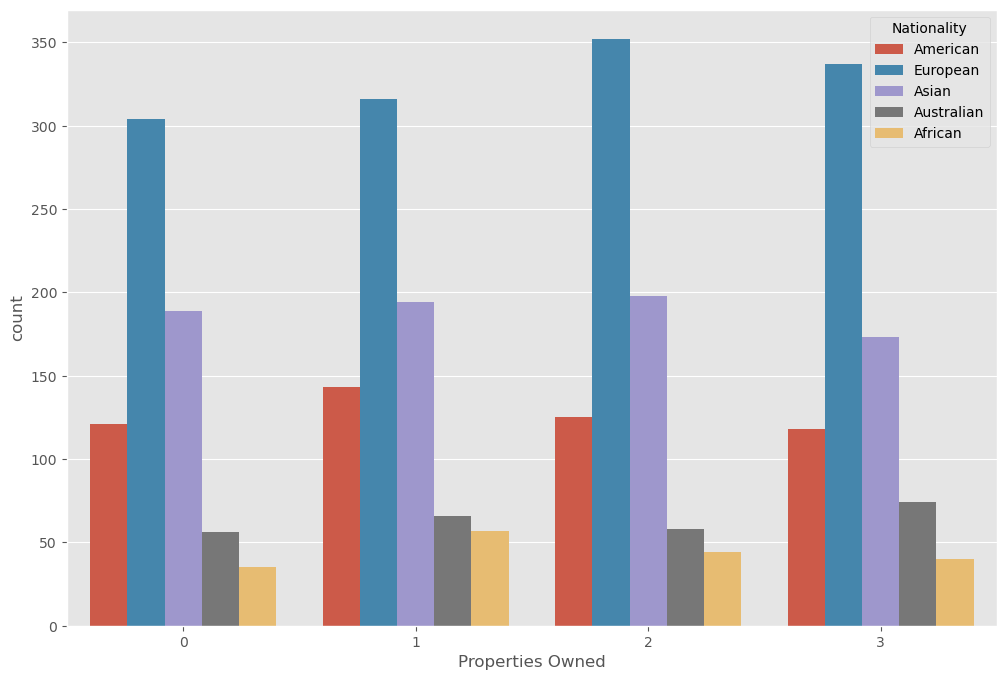

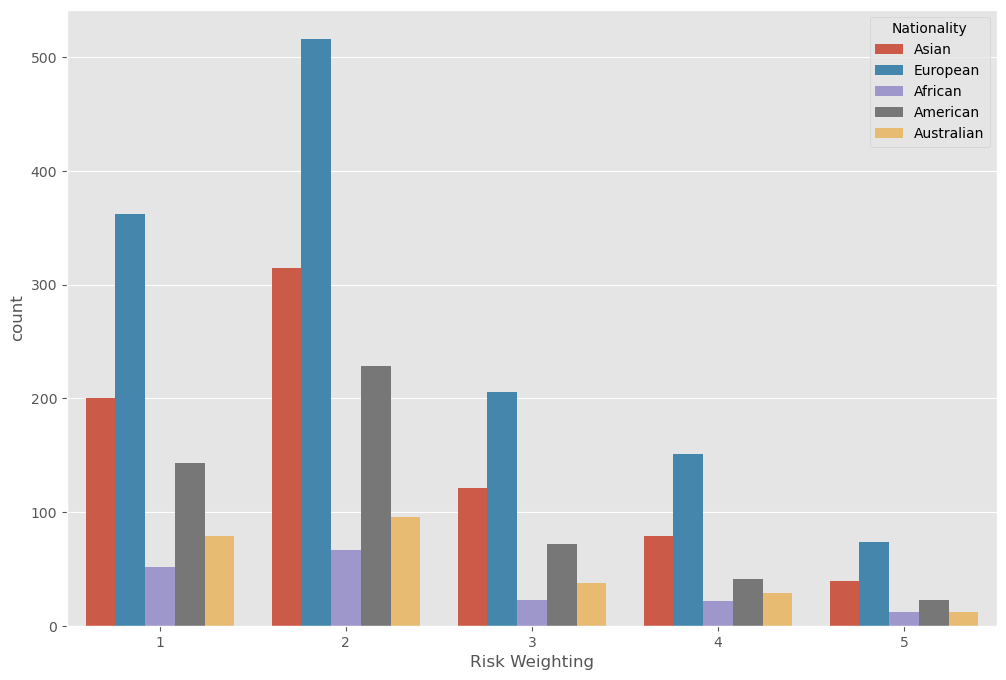

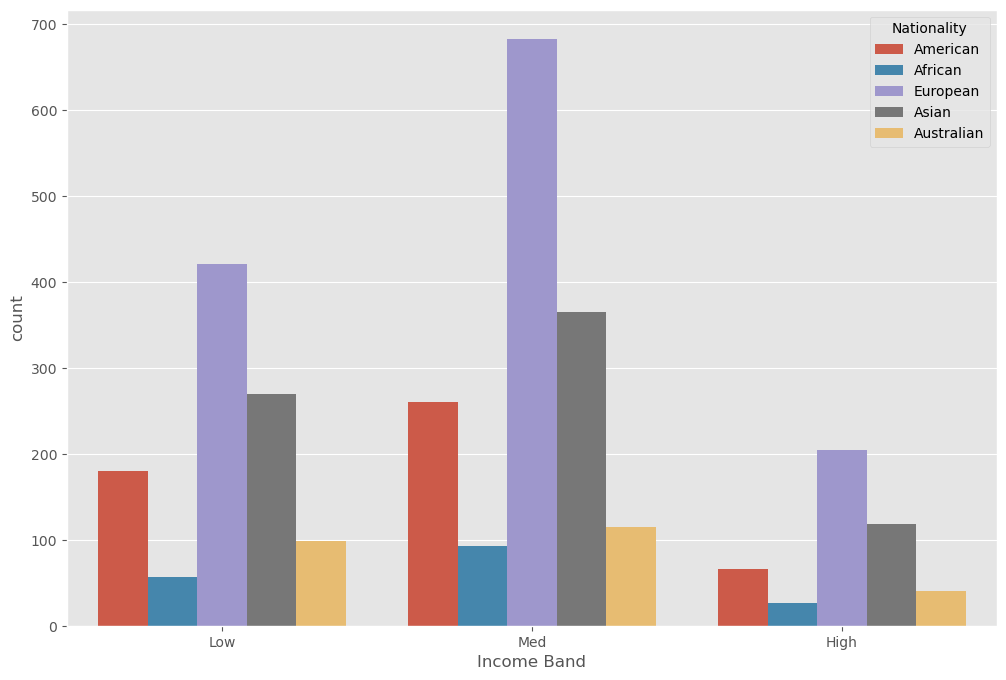

In [43]:
# Bivarite graphical analysis - by customer gender

for i, predictor in enumerate(df[['BRId', 'GenderId', 'Amount of Credit Cards','Nationality',
                                  'Loyalty Classification','Properties Owned', 'Risk Weighting', 'Income Band' ]]):
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue ='Nationality')

In [34]:
# looking at correlation
ndf = df.select_dtypes(include = 'number')

print(ndf)

      Age  Location ID  Estimated Income  Superannuation Savings  \
0      24        34324          75384.77                17677.95   
1      23        42205         289834.31                17398.92   
2      27         7314         169935.23                42825.90   
3      40        34594         356808.11                 5473.15   
4      46        41269         130711.68                48077.60   
...   ...          ...               ...                     ...   
2995   82         8760         297617.14                61177.60   
2996   44        32837          42397.46                33356.88   
2997   70        36088          48339.88                18889.92   
2998   56        24871         107265.87                11283.09   
2999   79        38518          56826.53                 8855.30   

      Amount of Credit Cards  Credit Card Balance  Bank Loans  Bank Deposits  \
0                          1               484.54   776242.92     1485828.64   
1                      

In [39]:
Corralation = ndf.corr()

# Setting parameters before coding
plt.rcParams['figure.figsize'] = (12,8)



<Axes: >

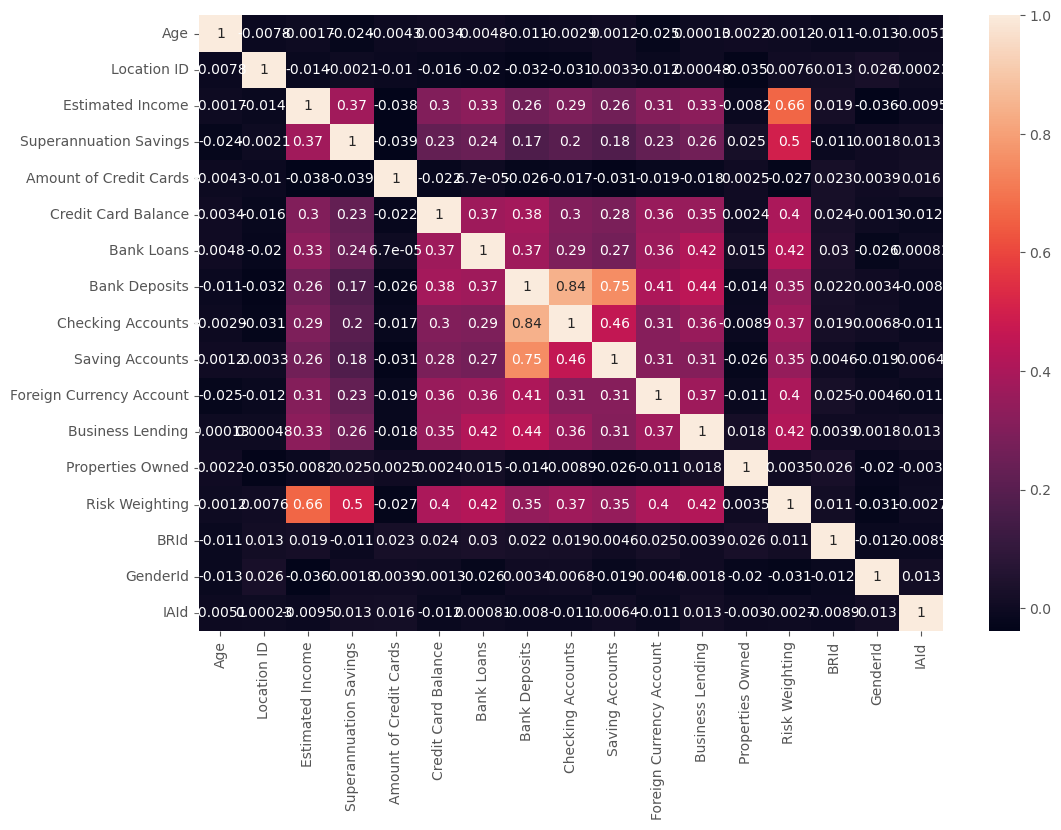

In [44]:
sns.heatmap(Corralation, annot = True)

A high correlation between bank deposits and checking and savings accounts suggests that changes in total deposits closely track changes in these specific accounts. This insight can help in managing liquidity risk, as it indicates a stable source of funding from these accounts. Additionally, it provides clues about customer behavior, showing how deposits might shift in response to changes like interest rate adjustments. Understanding this correlation is vital for effective risk management, particularly in maintaining adequate liquidity and ensuring compliance with financial regulations.

<function matplotlib.pyplot.show(close=None, block=None)>

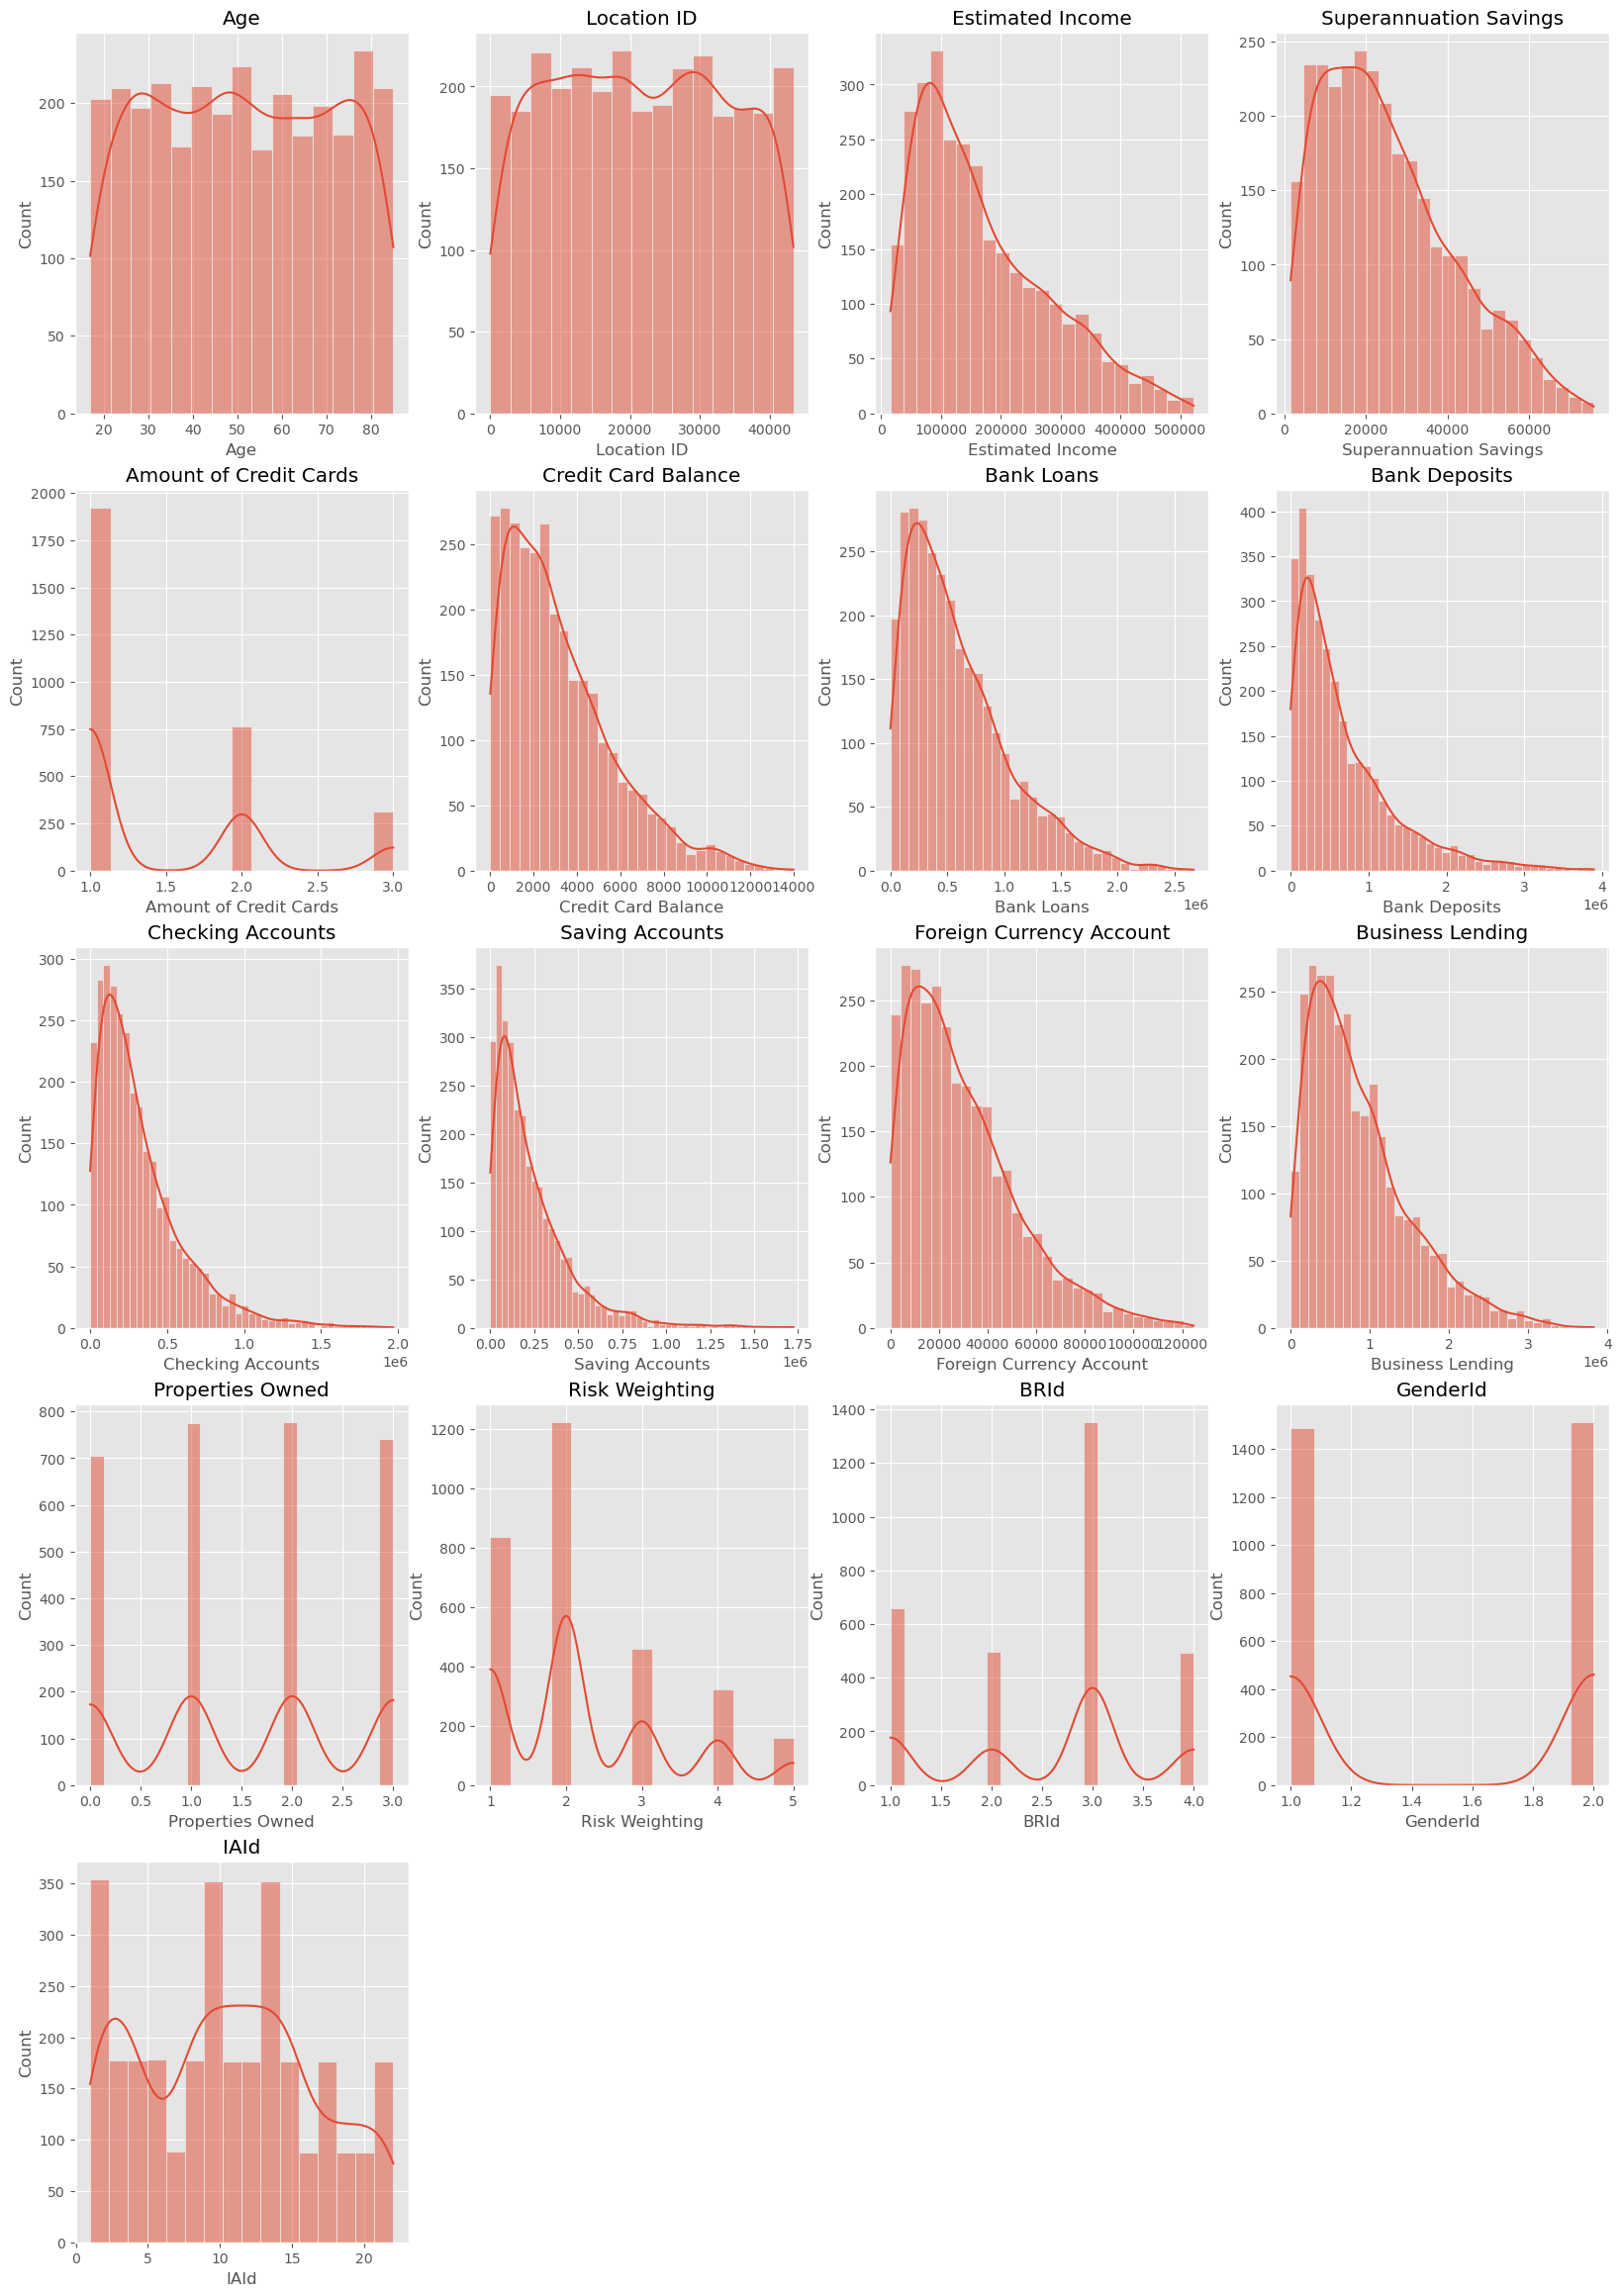

In [74]:
# Univariate analysis and visualisation
#numerical_iterable_cols = ['Estimated Income', 'Superannuation Savings']
plt.figure(figsize = (20,35))
for i, col in enumerate(ndf):
    plt.subplot(6, 4, i+1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.show